In [1]:
import os.path

import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
train_dataset = pd.read_csv('../../data/processed/trainData.csv')
test_dataset = pd.read_csv('../../data/processed/trainData.csv')

In [3]:
def preprocess_data(dataset):
    print(dataset)
    dataset = dataset.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','native-country'],axis=1)
    print(dataset.head)
    dataset['sex'] = np.where(dataset['sex'] == ' Male', 1, 0)
    dataset['race'] = np.where(dataset['race'] != ' White', 0, 1)
    dataset['Probability'] = np.where(dataset['Probability'] == ' <=50K', 0, 1)
    dataset['age'] = np.where(dataset['age'] >= 70, 70, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 60 ) & (dataset['age'] < 70), 60, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 50 ) & (dataset['age'] < 60), 50, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 40 ) & (dataset['age'] < 50), 40, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 30 ) & (dataset['age'] < 40), 30, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 20 ) & (dataset['age'] < 30), 20, dataset['age'])
    dataset['age'] = np.where((dataset['age'] >= 10 ) & (dataset['age'] < 10), 10, dataset['age'])
    dataset['age'] = np.where(dataset['age'] < 10, 0, dataset['age'])

    return dataset

In [4]:
train_dataset = preprocess_data(train_dataset)
print(train_dataset)
test_dataset = preprocess_data(test_dataset)
print(test_dataset)

       age          workclass  fnlwgt      education  education-num  \
0       52            Private  187938   Some-college             10   
1       43            Private  169628      Bachelors             13   
2       43   Self-emp-not-inc   89636      Bachelors             13   
3       32            Private  123291           12th              8   
4       32            Private   51150           12th              8   
...    ...                ...     ...            ...            ...   
36173   26            Private  177635           12th              8   
36174   21            Private  293968   Some-college             10   
36175   51          Local-gov  201040        Masters             14   
36176   53            Private  226135            9th              5   
36177   23            Private  315065           10th              6   

               marital-status          occupation    relationship  \
0                    Divorced               Sales   Not-in-family   
1        

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_dataset)
train_dataset = pd.DataFrame(scaler.transform(train_dataset), columns = train_dataset.columns)
test_dataset = pd.DataFrame(scaler.transform(test_dataset), columns = train_dataset.columns)

In [6]:
x_train, y_train = train_dataset.loc[:, train_dataset.columns != 'Probability'], train_dataset['Probability']
x_test, y_test = test_dataset.loc[:, test_dataset.columns != 'Probability'], test_dataset['Probability']

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.8669633478909835


In [9]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100)
logistic_classifier.fit(x_train, y_train)

y_pred_logistic = logistic_classifier.predict(x_test)

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred_logistic)))


Accuracy score: 0.8146940129360385


In [10]:
from sklearn.metrics import confusion_matrix



print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_logistic))

[[25960  1209]
 [ 3604  5405]]
[[25623  1546]
 [ 5158  3851]]


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['<=50k', '>50k']))
print(classification_report(y_test, y_pred_logistic, target_names=['<=50k', '>50k']))

              precision    recall  f1-score   support

       <=50k       0.88      0.96      0.92     27169
        >50k       0.82      0.60      0.69      9009

    accuracy                           0.87     36178
   macro avg       0.85      0.78      0.80     36178
weighted avg       0.86      0.87      0.86     36178

              precision    recall  f1-score   support

       <=50k       0.83      0.94      0.88     27169
        >50k       0.71      0.43      0.53      9009

    accuracy                           0.81     36178
   macro avg       0.77      0.69      0.71     36178
weighted avg       0.80      0.81      0.80     36178



/home/roham_ml/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/roham_ml/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


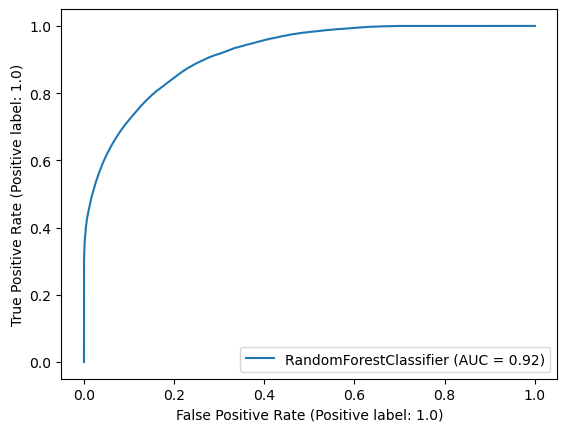

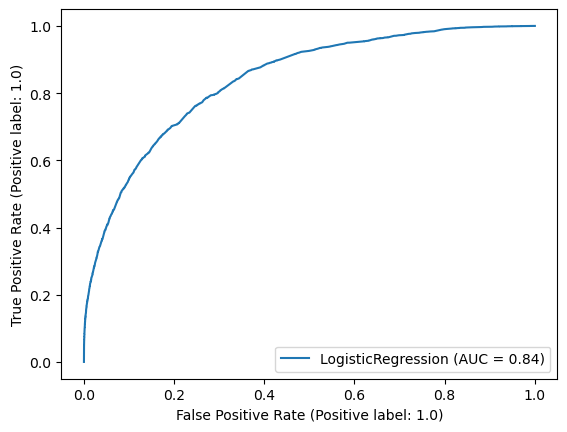

In [12]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(classifier, x_test, y_test)
plot_roc_curve(logistic_classifier, x_test, y_test)

In [13]:
from Metrics import *

protected_attributes = ('sex', 'race')

def get_allround_metrics(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes):

    print("recall :", measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'recall'))
    print("far :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'far'))
    print("precision :", measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'precision'))
    print("accuracy :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'accuracy'))
    print("F1 Score :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'F1'))
    print("aod :"+protected_attributes[0],measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'aod'))
    print("eod :"+protected_attributes[0],measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'eod'))

    print("SPD:",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'SPD'))
    print("DI:",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[0], 'DI'))

    print("-------------")

    print("recall :", measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'recall'))
    print("far :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'far'))
    print("precision :", measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'precision'))
    print("accuracy :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'accuracy'))
    print("F1 Score :",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'F1'))
    print("aod :"+protected_attributes[1],measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'aod'))
    print("eod :"+protected_attributes[1],measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'eod'))

    print("SPD:",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'SPD'))
    print("DI:",measure_final_score(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes[1], 'DI'))

print("\n\n\nmetrics for random forest classifier:")
get_allround_metrics(test_dataset, classifier, x_train, y_train, x_test, y_test, protected_attributes)

print("\n\n\nmetrics for Logistic regression:")
get_allround_metrics(test_dataset, logistic_classifier, x_train, y_train, x_test, y_test, protected_attributes)





metrics for random forest classifier:
recall : 0.6
far : 0.05
precision : 0.82
accuracy : 0.87
F1 Score : 0.69
aod :sex 0.06
eod :sex 0.17
SPD: 0.19
DI: 0.75
-------------
recall : 0.6
far : 0.05
precision : 0.82
accuracy : 0.87
F1 Score : 0.69
aod :race -0.01
eod :race 0.0
SPD: 0.09
DI: 0.41



metrics for Logistic regression:
recall : 0.43
far : 0.06
precision : 0.71
accuracy : 0.81
F1 Score : 0.54
aod :sex 0.1
eod :sex 0.28
SPD: 0.18
DI: 0.86
-------------
recall : 0.43
far : 0.06
precision : 0.71
accuracy : 0.81
F1 Score : 0.54
aod :race 0.04
eod :race 0.13
SPD: 0.1
DI: 0.6
